In [72]:
# Breast Cancer Dataset
# malignant or benign
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [73]:
# loading the dataset in a dataframe
breast_cancer_dataset = pd.read_csv('wdbc.data.mb.csv', header=None)

In [74]:
breast_cancer_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409,-1
1,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790,1
2,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301,-1
3,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917,-1
4,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563,-1


In [75]:
# dataset size
breast_cancer_dataset_shape = breast_cancer_dataset.shape

In [76]:
print('Dataset shape is rows {} and columns {}'.format(breast_cancer_dataset_shape[0], breast_cancer_dataset_shape[1]))

Dataset shape is rows 613 and columns 31


In [77]:
# loading attributes separately and labels separately in a dataframe
breast_cancer_attributes = breast_cancer_dataset.iloc[:,0:30]

In [78]:
breast_cancer_attributes.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
1,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,15.670,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790
2,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,13.760,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
3,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917
4,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,12.980,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563


In [79]:
breast_cancer_attributes.shape

(613, 30)

In [80]:
type(breast_cancer_attributes)

pandas.core.frame.DataFrame

In [81]:
breast_cancer_label = pd.DataFrame(breast_cancer_dataset.iloc[:,30])

In [82]:
breast_cancer_label.head()

,30
0,-1
1,1
2,-1
3,-1
4,-1


In [83]:
type(breast_cancer_label)

pandas.core.frame.DataFrame

In [84]:
breast_cancer_label.shape

(613, 1)

In [85]:
# checking for missing and null values
breast_cancer_attributes.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [86]:
# checking for missing and null values
breast_cancer_attributes.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [87]:
# Running exploratory analysis
breast_cancer_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       613 non-null    float64
 1   1       613 non-null    float64
 2   2       613 non-null    float64
 3   3       613 non-null    float64
 4   4       613 non-null    float64
 5   5       613 non-null    float64
 6   6       613 non-null    float64
 7   7       613 non-null    float64
 8   8       613 non-null    float64
 9   9       613 non-null    float64
 10  10      613 non-null    float64
 11  11      613 non-null    float64
 12  12      613 non-null    float64
 13  13      613 non-null    float64
 14  14      613 non-null    float64
 15  15      613 non-null    float64
 16  16      613 non-null    float64
 17  17      613 non-null    float64
 18  18      613 non-null    float64
 19  19      613 non-null    float64
 20  20      613 non-null    float64
 21  21      613 non-null    float64
 22  22

In [88]:
# Running exploratory analysis
breast_cancer_attributes.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,14.192026,19.391240,92.412969,661.607830,0.096297,0.104640,0.089480,0.049305,0.181179,0.062682,...,16.352396,25.813230,107.877357,889.765905,0.132668,0.256682,0.274511,0.115708,0.291009,0.084008
std,3.563524,4.352253,24.563996,359.449204,0.013984,0.052168,0.079377,0.038684,0.027249,0.006988,...,4.848889,6.235422,33.711680,573.482567,0.022991,0.156054,0.206105,0.065465,0.062156,0.017876
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.740000,16.320000,75.460000,422.900000,0.086050,0.066010,0.029740,0.020360,0.161900,0.057660,...,13.060000,21.180000,84.460000,516.500000,0.117000,0.148200,0.118100,0.065280,0.251000,0.071850
50%,13.440000,18.900000,87.020000,556.700000,0.095860,0.094620,0.064760,0.034850,0.179700,0.061540,...,15.050000,25.460000,98.400000,697.700000,0.131600,0.216700,0.231800,0.101700,0.283300,0.080200
75%,16.020000,21.880000,104.700000,793.200000,0.105100,0.130600,0.130700,0.073640,0.195900,0.066060,...,19.070000,30.120000,126.300000,1095.000000,0.146100,0.342000,0.386100,0.162800,0.318700,0.092090
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
# data needs to be standardized as the ranges of the various columns vary

In [90]:
breast_cancer_attributes.dtypes
# making sure data is numerical

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object

In [91]:
# class distribution benign 378 and malignant 235
breast_cancer_label.value_counts()

30
-1    378
 1    235
dtype: int64

In [92]:
breast_cancer_label

,30
0,-1
1,1
2,-1
3,-1
4,-1
...,...
608,-1
609,1
610,-1
611,-1


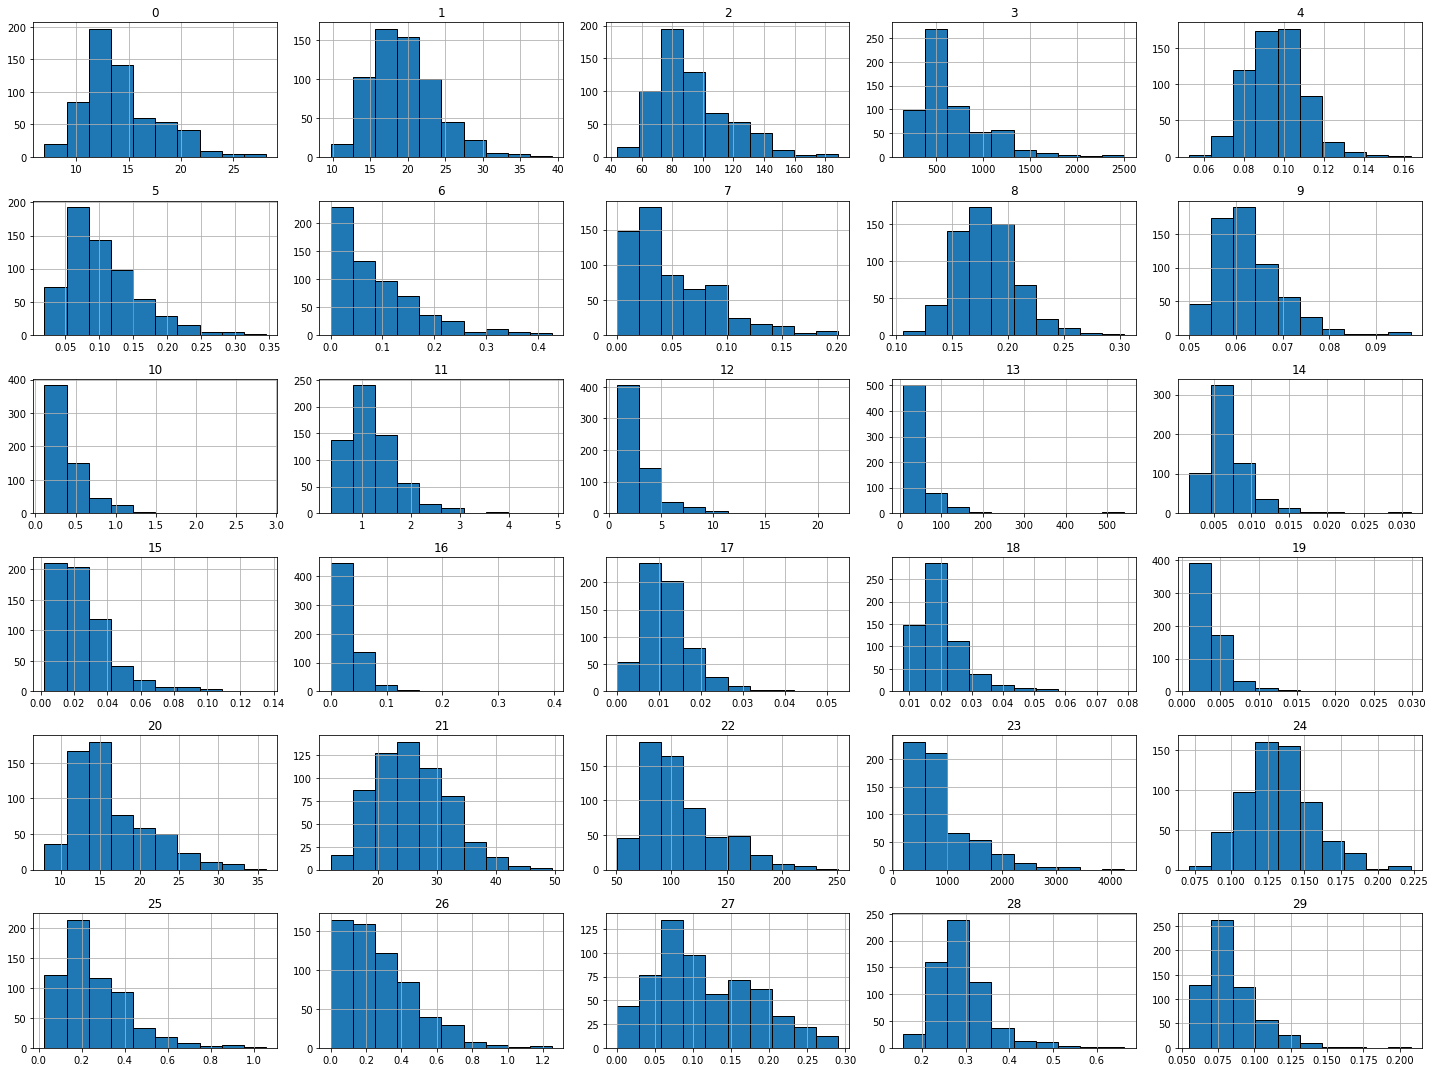

0     0.972263
1     0.659821
2     1.017334
3     1.704350
4     0.454859
5     1.152418
6     1.395618
7     1.160553
8     0.667703
9     1.276769
10    3.491304
11    1.609469
12    3.876919
13    5.692288
14    2.681517
15    1.889816
16    5.003752
17    1.483250
18    2.181164
19    3.951689
20    1.084649
21    0.510192
22    1.099354
23    1.822827
24    0.452004
25    1.400533
26    1.110161
27    0.475372
28    1.368637
29    1.610002
dtype: float64


In [93]:
breast_cancer_attributes.hist(figsize=(20,15),grid = True, edgecolor = 'black')
plt.tight_layout()
plt.show()
print(breast_cancer_attributes.skew())

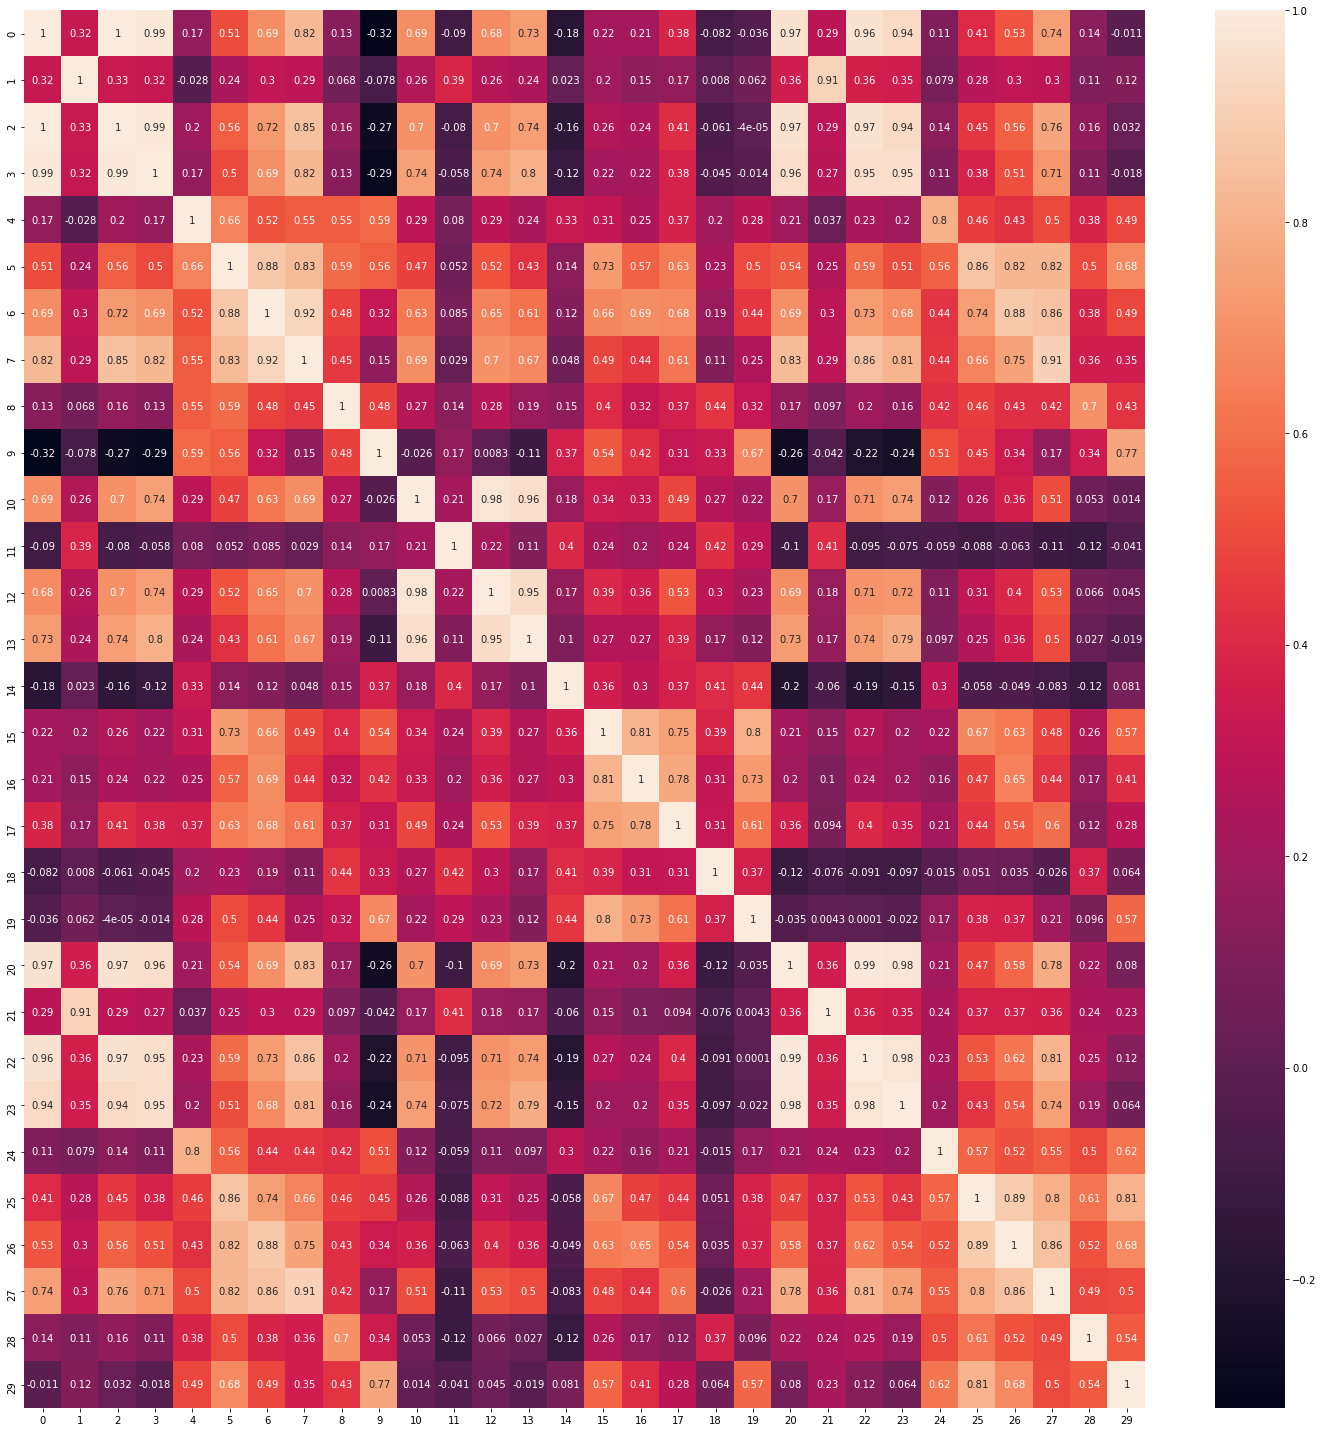

In [94]:
# Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(breast_cancer_attributes.corr(), annot = True)
plt.tight_layout()
plt.show()

In [95]:
cor_matrix = breast_cancer_attributes.corr().abs()
print(cor_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.324421  0.997948  0.986875  0.165697  0.506218  0.685879   
1   0.324421  1.000000  0.330086  0.320542  0.028195  0.237780  0.304899   
2   0.997948  0.330086  1.000000  0.986043  0.201951  0.555777  0.723987   
3   0.986875  0.320542  0.986043  1.000000  0.172397  0.495347  0.693962   
4   0.165697  0.028195  0.201951  0.172397  1.000000  0.658354  0.520132   
5   0.506218  0.237780  0.555777  0.495347  0.658354  1.000000  0.879016   
6   0.685879  0.304899  0.723987  0.693962  0.520132  0.879016  1.000000   
7   0.824930  0.294472  0.852610  0.823603  0.549886  0.829847  0.923972   
8   0.130304  0.067981  0.164524  0.131521  0.549610  0.591380  0.482802   
9   0.321901  0.078089  0.273086  0.294176  0.586576  0.555374  0.317712   
10  0.685380  0.260047  0.696174  0.743690  0.291880  0.474699  0.626050   
11  0.090186  0.388252  0.079672  0.057769  0.080222  0.052177  0.084760   
12  0.681511

In [96]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

    0         1         2         3         4         5         6         7   \
0  NaN  0.324421  0.997948  0.986875  0.165697  0.506218  0.685879  0.824930   
1  NaN       NaN  0.330086  0.320542  0.028195  0.237780  0.304899  0.294472   
2  NaN       NaN       NaN  0.986043  0.201951  0.555777  0.723987  0.852610   
3  NaN       NaN       NaN       NaN  0.172397  0.495347  0.693962  0.823603   
4  NaN       NaN       NaN       NaN       NaN  0.658354  0.520132  0.549886   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.879016  0.829847   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.923972   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

<ipython-input-96-56dc5b2d0b9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [97]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

[2, 3, 7, 12, 13, 20, 21, 22, 23, 27]

In [98]:
# correlated variables removed dataset
breast_cancer_attributes_reduced = breast_cancer_attributes.drop(breast_cancer_attributes.columns[to_drop], axis=1)
breast_cancer_attributes_reduced.head()

,0,1,4,5,6,8,9,10,11,14,15,16,17,18,19,24,25,26,28,29
0,8.196,16.84,0.08600,0.05943,0.01588,0.1769,0.06503,0.1563,0.9567,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,0.1297,0.13570,0.06880,0.3105,0.07409
1,13.170,18.66,0.11580,0.12310,0.12260,0.2128,0.06777,0.2871,0.8937,0.006532,0.023360,0.02905,0.012150,0.01743,0.003643,0.1786,0.41660,0.50060,0.3900,0.11790
2,12.050,14.63,0.10310,0.09092,0.06592,0.1675,0.06043,0.2636,0.7294,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,0.1494,0.21560,0.30500,0.2747,0.08301
3,13.490,22.30,0.08752,0.07698,0.04751,0.1809,0.05718,0.2338,1.3530,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,0.1162,0.17110,0.22820,0.2871,0.06917
4,11.760,21.60,0.08637,0.04966,0.01657,0.1495,0.05888,0.4062,1.2100,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,0.1085,0.08615,0.05523,0.2433,0.06563


In [99]:
train_attributes, test_attributes, train_label, test_label = train_test_split( breast_cancer_attributes, breast_cancer_label, test_size=0.3, random_state=0)
train_reduced_attributes, test_reduced_attributes = train_test_split( breast_cancer_attributes_reduced, test_size=0.3, random_state=0)

In [100]:
train_attributes.shape

(429, 30)

In [101]:
test_attributes.shape

(184, 30)

In [102]:
train_label.shape

(429, 1)

In [103]:
test_label.shape

(184, 1)

In [104]:
# Data Preparation for PCA transformation
# Standardizing the features
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_attributes)
# Apply transformation to both the train and the test set.
train_standard_attributes = scaler.transform(train_attributes)
test_standard_attributes = scaler.transform(test_attributes)

In [105]:
pca = PCA(.95)

In [106]:
pca.fit(train_standard_attributes)

PCA(n_components=0.95)

In [107]:
train_pca = pca.transform(train_standard_attributes)
test_pca = pca.transform(test_standard_attributes)

In [108]:
# Applying various machine learning models
# Logistic Regression on dataset with correlated attributes removed
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_reduced_attributes, train_label)

C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [109]:
test_predicted = classifier.predict(test_reduced_attributes)

In [110]:
print("Accuracy_logistic regression:",metrics.accuracy_score(test_label, test_predicted))

Accuracy_logistic regression: 0.9402173913043478


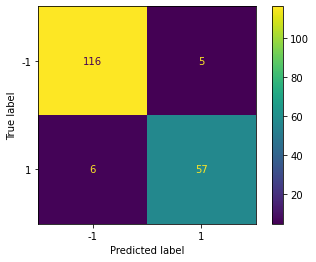

In [111]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [112]:
# Logistic Regression with PCA
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_pca, train_label)

C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [113]:
test_predicted = classifier.predict(test_pca)

In [114]:
print("Accuracy_logistic regression_PCA:",metrics.accuracy_score(test_label, test_predicted))

Accuracy_logistic regression_PCA: 0.9782608695652174


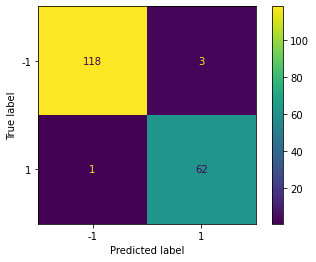

In [115]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [116]:
# K Nearest Neighbors Classifiers on correlated attributes removed dataset
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_reduced_attributes, train_label)

<ipython-input-116-1db583d329c6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(train_reduced_attributes, train_label)


KNeighborsClassifier()

In [117]:
test_predicted = classifier.predict(test_reduced_attributes)

In [118]:
print("Accuracy_kNN:",metrics.accuracy_score(test_label, test_predicted))

Accuracy_kNN: 0.8967391304347826


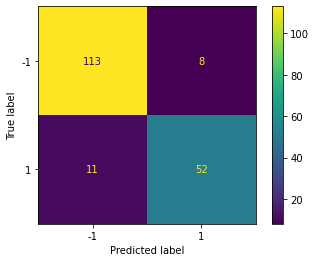

In [119]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [120]:
# kNN with PCA
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_pca, train_label)

<ipython-input-120-b6bfc640b9ad>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(train_pca, train_label)


KNeighborsClassifier()

In [121]:
test_predicted = classifier.predict(test_pca)

In [122]:
print("Accuracy_kNN_PCA :",metrics.accuracy_score(test_label, test_predicted))

Accuracy_kNN_PCA : 0.9565217391304348


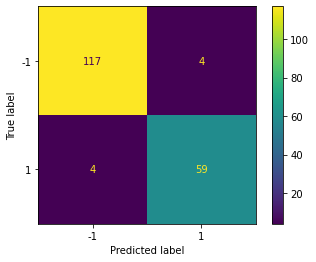

In [123]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [124]:
# Naive Bayes on correlated attributes removed dataset
classifier = GaussianNB()
classifier.fit(train_reduced_attributes, train_label)

C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [125]:
test_predicted = classifier.predict(test_reduced_attributes)

In [126]:
print("Accuracy_NaiveBayes :",metrics.accuracy_score(test_label, test_predicted))

Accuracy_NaiveBayes : 0.9021739130434783


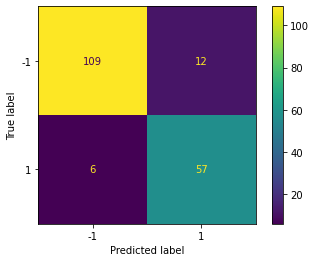

In [127]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [128]:
# Naive Bayes on PCA
classifier = GaussianNB()
classifier.fit(train_pca, train_label)

C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [129]:
test_predicted = classifier.predict(test_pca)

In [130]:
print("Accuracy_NaiveBayes_PCA :",metrics.accuracy_score(test_label, test_predicted))

Accuracy_NaiveBayes_PCA : 0.907608695652174


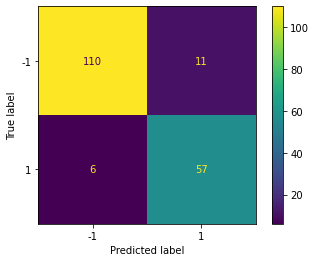

In [131]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [132]:
# SVM on correlated attributes removed dataset
classifier = SVC(kernel = 'linear')

In [133]:
classifier.fit(train_reduced_attributes, train_label)
test_predicted = classifier.predict(test_reduced_attributes)
print("Accuracy_SVM:",metrics.accuracy_score(test_label, test_predicted))

Accuracy_SVM: 0.9456521739130435


C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


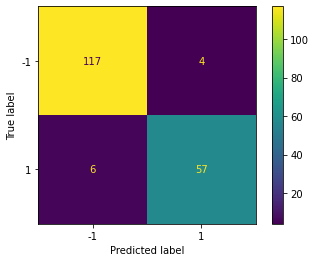

In [134]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [135]:
classifier = SVC(kernel = 'linear')
classifier.fit(train_pca, train_label)
test_predicted = classifier.predict(test_pca)
print("Accuracy_SVM_PCA:",metrics.accuracy_score(test_label, test_predicted))

Accuracy_SVM_PCA: 0.967391304347826


C:\Users\Nishank\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


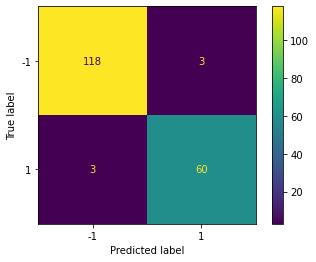

In [136]:
cm = confusion_matrix(test_label, test_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()